In [1]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
import pandas as pd

In [2]:
df=pd.read_csv('../2k.dat',sep=' ')
df

,x1,y1,x2,y2,t,r,E
0,0.000000e+00,0.000000,2.000000,0.00000,0.000,2.00000,8.300303e-322
1,6.250000e-08,-0.000040,1.999990,0.00400,0.001,2.00000,8.300303e-322
2,2.500000e-07,-0.000080,1.999970,0.00800,0.002,1.99999,8.300303e-322
3,5.625000e-07,-0.000120,1.999940,0.01200,0.003,1.99998,8.300303e-322
4,1.000000e-06,-0.000160,1.999900,0.01600,0.004,1.99996,8.300303e-322
...,...,...,...,...,...,...,...
9996,1.358620e-02,-0.013648,0.641376,1.36480,9.996,1.51468,8.300303e-322
9997,1.364260e-02,-0.013652,0.635739,1.36517,9.997,1.51267,8.300303e-322
9998,1.369910e-02,-0.013655,0.630093,1.36552,9.998,1.51065,8.300303e-322
9999,1.375560e-02,-0.013658,0.624439,1.36584,9.999,1.50863,8.300303e-322


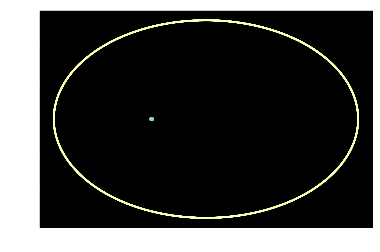

In [3]:
plt.style.use('dark_background')
plt.plot(df['x1'],df['y1'])
plt.plot(df['x2'],df['y2'])
plt.savefig('planet.svg')

In [4]:
# initialization function 
def init(): 
	# creating an empty plot/frame 
	line1.set_data([], []) 
	line2.set_data([], []) 
	points.set_data([], [])
	return line1, line2, points

# animation function 
def animate(i): 
	k = 10*i
	# x, y values to be plotted 
	x1 = df['x1'][k]
	y1 = df['y1'][k]
	x2 = df['x2'][k]
	y2 = df['y2'][k]
	
	# appending new points to x, y axes points list 
	x1data.append(x1) 
	y1data.append(y1)
	x2data.append(x2)
	y2data.append(y2)

	line1.set_data(x1data, y1data) 
	line2.set_data(x2data, y2data)
	points.set_data([x1,x2], [y1,y2])
	return line1, line2 , points

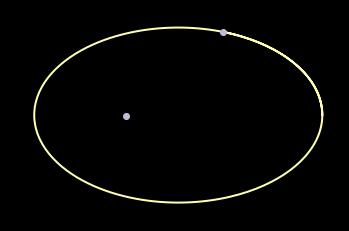

In [5]:
plt.style.use('dark_background')

# lists to store x and y axis points 
x1data, y1data, x2data, y2data = [], [], [], [] 

fig = plt.figure() 
ax = plt.axes(xlim=(-1.2, 2.2), ylim=(-1.7, 1.7)) 
line1, = ax.plot([], [], lw=2) 
line2, = ax.plot([], [], lw=2) 
points, = ax.plot([], [], 'o')

# setting a title for the plot 
# plt.title('Creating a growing coil with matplotlib!') 
# hiding the axis details 
plt.axis('off') 

# call the animator	 
anim = animation.FuncAnimation(fig, animate,  init_func=init,
							frames=200, interval=20, blit=True) 

# save the animation as mp4 video file 
anim.save('planet.gif',writer='imagemagick') 